In [1]:
from enemy_search import Agent
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'Environment'

In [ ]:
class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[None for _ in range(width)] for _ in range(height)]

    def add_agent(self, agent):
        x, y = agent.x, agent.y
        if self.grid[y][x] is None:
            self.grid[y][x] = agent
            agent.environment = self
            return True
        else:
            return False

    def move_agent(self, agent, new_x, new_y):
        if 0 <= new_x < self.width and 0 <= new_y < self.height and self.grid[new_y][new_x] is None:
            self.grid[agent.y][agent.x] = None
            agent.prevx, agent.prevy = agent.x, agent.y
            agent.x, agent.y = new_x, new_y
            self.grid[new_y][new_x] = agent
            return True
        else:
            return False

    def print_environment(self):
        # Print top border
        print("+" + "-" * (2 * self.width - 1) + "+")

        for y in range(self.height):
            print(f"{y}|", end=" ")  # Add row index
            for x in range(self.width):
                if self.grid[y][x] is None:
                    print(" ", end=" ")
                else:
                    print("X", end=" ")  # You can customize this to represent different agent types
            print("|")

        # Print bottom border
        print("+" + "-" * (2 * self.width - 1) + "+")

        # Print column indices
        print(" " * 3 + "".join([f"{i} " for i in range(self.width)]))

In [ ]:

# Example usage:
env = Environment(width=10, height=10)
agent = Agent(unique_id=1, x=3, y=4, agent_type="TypeA", view_sight=3, gather_sight=2)

if env.add_agent(agent):
    print("Agent added to the environment.")
else:
    print("Failed to add agent, position already occupied.")

# Move the agent
new_x = 5
new_y = 6
if agent.move(new_x, new_y):
    print(f"Agent moved to ({new_x}, {new_y}).")
else:
    print(f"Failed to move agent to ({new_x}, {new_y}), position already occupied.")

# Print the environment
env.print_environment()


In [36]:
import random

class Agent:
    def __init__(self, unique_id, x, y, agent_type, view_sight, gather_sight):
        self.unique_id = unique_id
        self.x = x
        self.y = y
        self.prevx = x
        self.prevy = y
        self.agent_type = agent_type
        self.view_sight = view_sight
        self.gather_sight = gather_sight
        self.environment = None
        self.bushes = set()  # Initialize bushes as an empty set

    def move(self, new_x, new_y):
        return self.environment.move_agent(self, new_x, new_y)

    def random_search(self):
        # Eight possible moves
        possible_moves = [
            (self.x + 1, self.y),  # right
            (self.x + 1, self.y + 1),
            (self.x + 1, self.y - 1),
            (self.x - 1, self.y),  # left
            (self.x - 1, self.y + 1),
            (self.x - 1, self.y - 1),
            (self.x, self.y + 1),  # up
            (self.x, self.y - 1),
        ]

        # Filter out moves outside environment boundaries
        valid_moves = [(x, y) for x, y in possible_moves if 0 <= x < self.environment.width and 0 <= y < self.environment.height]

        # Filter out moves that correspond to bushes
        valid_moves = [move for move in valid_moves if move not in self.bushes]

        return random.choice(valid_moves) if valid_moves else (self.x, self.y)

class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[None for _ in range(width)] for _ in range(height)]

    def add_agent(self, agent):
        x, y = agent.x, agent.y
        if self.grid[y][x] is None:
            self.grid[y][x] = agent
            agent.environment = self
            return True
        else:
            return False

    def move_agent(self, agent, new_x, new_y):
        if 0 <= new_x < self.width and 0 <= new_y < self.height and self.grid[new_y][new_x] is None:
            self.grid[agent.y][agent.x] = None
            agent.prevx, agent.prevy = agent.x, agent.y
            agent.x, agent.y = new_x, new_y
            self.grid[new_y][new_x] = agent
            return True
        else:
            return False

    def print_environment(self):
        # Print top border
        print("+" + "-" * (2 * self.width - 1) + "+")

        for y in range(self.height):
            print(f"{y}|", end=" ")  # Add row index
            for x in range(self.width):
                if self.grid[y][x] is None:
                    print(" ", end=" ")
                else:
                    print("X", end=" ")  # You can customize this to represent different agent types
            print("|")

        # Print bottom border
        print("+" + "-" * (2 * self.width - 1) + "+")

        # Print column indices
        print(" " * 3 + "".join([f"{i} " for i in range(self.width)]))

# Example usage:
env = Environment(width=10, height=10)
agent = Agent(unique_id=1, x=3, y=4, agent_type="TypeA", view_sight=3, gather_sight=2)

# Add bushes to the environment
agent.bushes = {(2, 2), (4, 4), (6, 6)}  # Example bushes

if env.add_agent(agent):
    print("Agent added to the environment.")
else:
    print("Failed to add agent, position already occupied.")

# Move the agent using random_search
new_x, new_y = agent.random_search()
if agent.move(new_x, new_y):
    print(f"Agent moved to ({new_x}, {new_y}).")
else:
    print(f"Failed to move agent to ({new_x}, {new_y}), position already occupied.")

# Print the environment
env.print_environment()


Agent added to the environment.
Agent moved to (4, 3).
+-------------------+
0|                     |
1|                     |
2|                     |
3|         X           |
4|                     |
5|                     |
6|                     |
7|                     |
8|                     |
9|                     |
+-------------------+
   0 1 2 3 4 5 6 7 8 9 


In [124]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class Agent:
    def __init__(self, unique_id, x, y, agent_type, view_sight, gather_sight, side):
        self.unique_id = unique_id
        self.x = x
        self.y = y
        self.prevx = x
        self.prevy = y
        self.agent_type = agent_type
        self.view_sight = view_sight
        self.gather_sight = gather_sight
        self.environment = None
        self.side = side
        self.bushes = set()

    def move(self, new_x, new_y):
        return self.environment.move_agent(self, new_x, new_y)

    def random_search(self):
        possible_moves = [
            (self.x + 1, self.y),  # right
            (self.x + 1, self.y + 1),
            (self.x + 1, self.y - 1),
            (self.x - 1, self.y),  # left
            (self.x - 1, self.y + 1),
            (self.x - 1, self.y - 1),
            (self.x, self.y + 1),  # up
            (self.x, self.y - 1),
        ]

        valid_moves = [(x, y) for x, y in possible_moves if 0 <= x < self.environment.width and 0 <= y < self.environment.height]
        valid_moves = [move for move in valid_moves if move not in self.bushes]

        return random.choice(valid_moves) if valid_moves else (self.x, self.y)

class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[None for _ in range(width)] for _ in range(height)]
        self.bushes = set()

    def add_agent(self, agent):
        x, y = agent.x, agent.y
        if self.grid[y][x] is None:
            self.grid[y][x] = agent
            agent.environment = self
            agent.side = "left" if x < self.width // 2 else "right"  # Initialize agent's side
            return True
        else:
            return False

    def move_agent(self, agent, new_x, new_y):
        if 0 <= new_x < self.width and 0 <= new_y < self.height and self.grid[new_y][new_x] is None:
            self.grid[agent.y][agent.x] = None
            agent.prevx, agent.prevy = agent.x, agent.y
            agent.x, agent.y = new_x, new_y
            self.grid[new_y][new_x] = agent
            return True
        else:
            return False

    def add_bushes(self, side, num_bushes):
        for _ in range(num_bushes):
            x = random.randint(0, self.width // 2) if side == "left" else random.randint(self.width // 2, self.width - 1)
            y = random.randint(0, self.height - 1)
            self.bushes.add((x, y))

    def print_environment(self):
        for y in range(self.height):
            for x in range(self.width):
                if self.grid[y][x] is None:
                    print(" ", end=" ")
                else:
                    print("X", end=" ")  # You can customize this to represent different agent types
            print()

    def plot_environment(self):
        fig, ax = plt.subplots()

        for y in range(self.height):
            for x in range(self.width):
                if (x, y) in self.bushes:
                    circle = patches.Circle((x + 0.5, y + 0.5), 0.4, color='green', fill=True)
                    ax.add_patch(circle)
                elif self.grid[y][x] is not None:
                    ax.text(x + 0.5, y + 0.5, 'X', ha='center', va='center', color='black', fontsize=12)

        ax.set_xlim(0, self.width)
        ax.set_ylim(0, self.height)
        ax.set_aspect('equal', 'box')
        plt.show()

# Example usage:
env = Environment(width=10, height=10)
# agent = Agent(unique_id=1, x=3, y=4, agent_type="TypeA", view_sight=3, gather_sight=2, side="")
agent = Agent(unique_id=1, x=3, y=4, agent_type="TypeA", view_sight=3, gather_sight=2, side="left")
env.add_agent(agent)

# Add bushes to the environment on the agent's side
env.add_bushes(side=agent.side, num_bushes=20)

# Move the agent using random_search
new_x, new_y = agent.random_search()
agent.move(new_x, new_y)

# Print the environment
# env.print_environment()

# # Plot the environment with bushes as circles
# env.plot_environment()


True

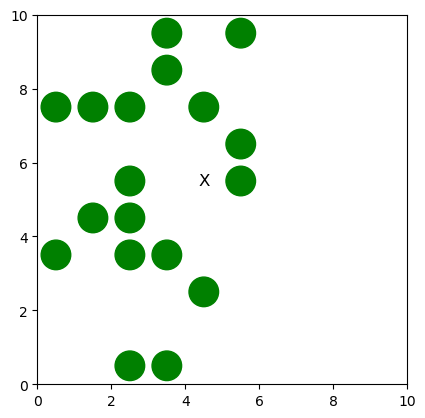

In [162]:
# Move the agent using random_search
new_x, new_y = agent.random_search()
agent.move(new_x, new_y)

# Plot the environment with bushes as circles
env.plot_environment()
